In [2]:
import pandas as pd
import numpy as np

In [93]:
df_1=pd.read_csv("Desktop/Diwali Sales Data.csv",encoding="latin")
df=pd.read_csv("Desktop/Diwali Sales Data.csv",encoding ="latin")

# Data cleaning and processing

# checking null values

In [4]:
df.isnull().sum() 

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

# Filling null value with mean value 

In [ ]:
df["Amount"].fillna(df["Amount"].mean(),inplace=True)


# Droping null value 

In [151]:
df.dropna(axis=1,inplace=True)

# grouping all states different to see which state has highest number of orders

In [143]:
state=df.groupby("State")["State"].value_counts() 
df_state1=pd.DataFrame(state)
df_state1.reset_index(inplace=True)
df_state1.sort_values(by="count",ascending=False,inplace=True)
df_state1

,State,count
14,Uttar Pradesh,1946
10,Maharashtra,1526
7,Karnataka,1305
2,Delhi,1107
9,Madhya Pradesh,923
0,Andhra Pradesh,812
5,Himachal Pradesh,608
8,Kerala,453
4,Haryana,452
1,Bihar,434


In [135]:

state=df.groupby("State")["Amount"].sum() 
df_state=pd.DataFrame(state)
df_state.reset_index(inplace=True)
df_state.sort_values(by="Amount",ascending=False,inplace=True)
df_state

,State,Amount
14,Uttar Pradesh,1.939388e+07
10,Maharashtra,1.443700e+07
7,Karnataka,1.353299e+07
2,Delhi,1.163218e+07
9,Madhya Pradesh,8.120049e+06
0,Andhra Pradesh,8.046601e+06
5,Himachal Pradesh,4.963368e+06
4,Haryana,4.220175e+06
1,Bihar,4.022757e+06
3,Gujarat,3.964989e+06


 # grouping all states different to see which state has highest sales

In [58]:
age_group=df["Age Group"].value_counts()  #grouping all age to observe the data
df_age_group=pd.DataFrame(age_group)
df_age_group.reset_index(inplace=True)
df_age_group 

,Age Group,count
0,26-35,4543
1,36-45,2286
2,18-25,1879
3,46-50,987
4,51-55,832
5,55+,428
6,0-17,296



# grouping product and amount to see which product has highest sales

In [125]:
df_amount=df.groupby("Product_Category")["Amount"].sum() 
df_amount=pd.DataFrame(df_amount)
df_amount.sort_values(by="Amount",ascending=False,inplace=True)
df_amount.reset_index(inplace=True)

In [17]:
product=df.groupby("Product_Category")["Product_Category"].value_counts()
df_product=pd.DataFrame(product)
df_product.reset_index(inplace=True)
df_product=df_product.sort_values(by="count",ascending=False)

# grouping all age group with product category 

In [ ]:
age_product=df.groupby("Age Group")["Product_Category"].value_counts() 
df_age_product=pd.DataFrame(age_product)
df_age_product.reset_index(inplace=True)
df_age_product.nunique()


# grouping all product which is purchase by women

In [63]:
female=df[df["Gender"]=="F"].groupby("Product_Category")["Product_Category"].value_counts()  
df_female=pd.DataFrame(female) 
df_female.reset_index(inplace=True)

# grouping all product which is purchase by Men

In [146]:
male=df[df["Gender"]=="M"].groupby("Product_Category")["Product_Category"].value_counts()
df_male=pd.DataFrame(male)
df_male.reset_index(inplace=True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization with help of matplotlib and seaborn

<Axes: title={'center': 'TOP 5 State by sales'}, xlabel='State', ylabel='Amount'>

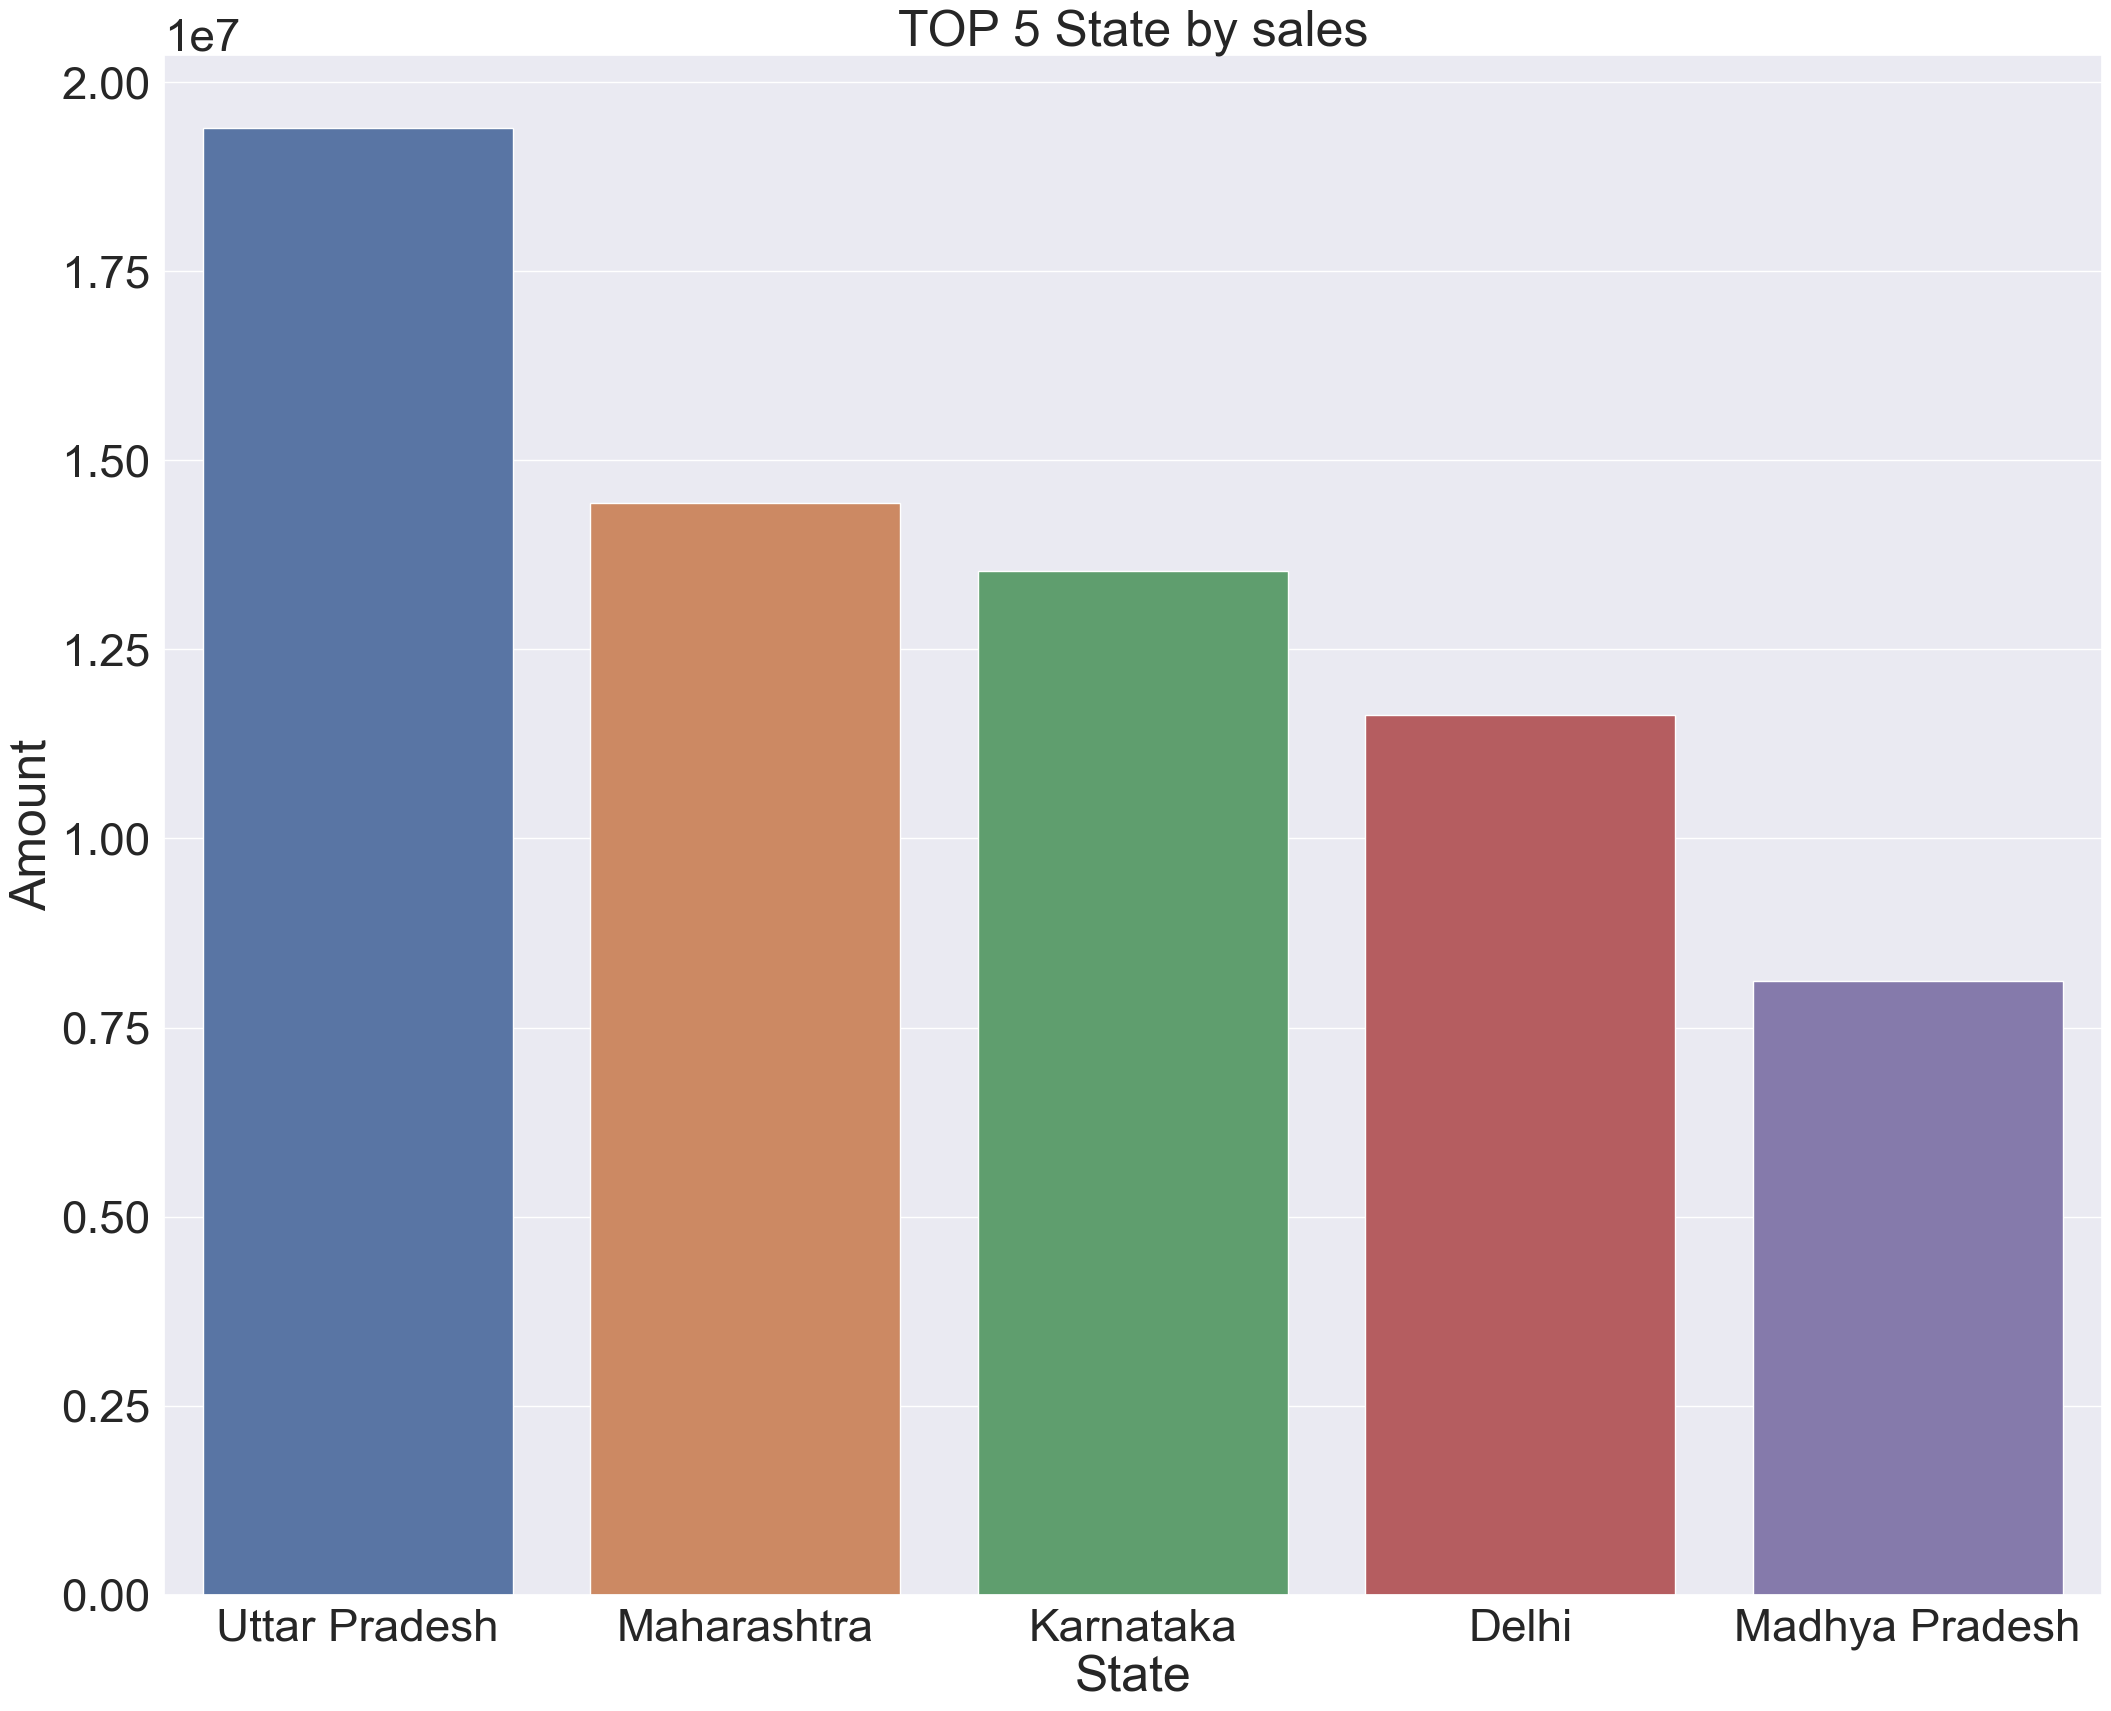

In [138]:
plt.figure(figsize=(25,20))
plt.title("TOP 5 State by sales")
sns.barplot(x="State",y="Amount",data=df_state.head(5))

# CONCLUSION :- TOP 5 STATES BY SALES
# 1)  Uttar Pradesh
# 2)  Maharashtra
# 3)  Karnataka
# 4)  Delhi
# 5)  Madhya Pradesh

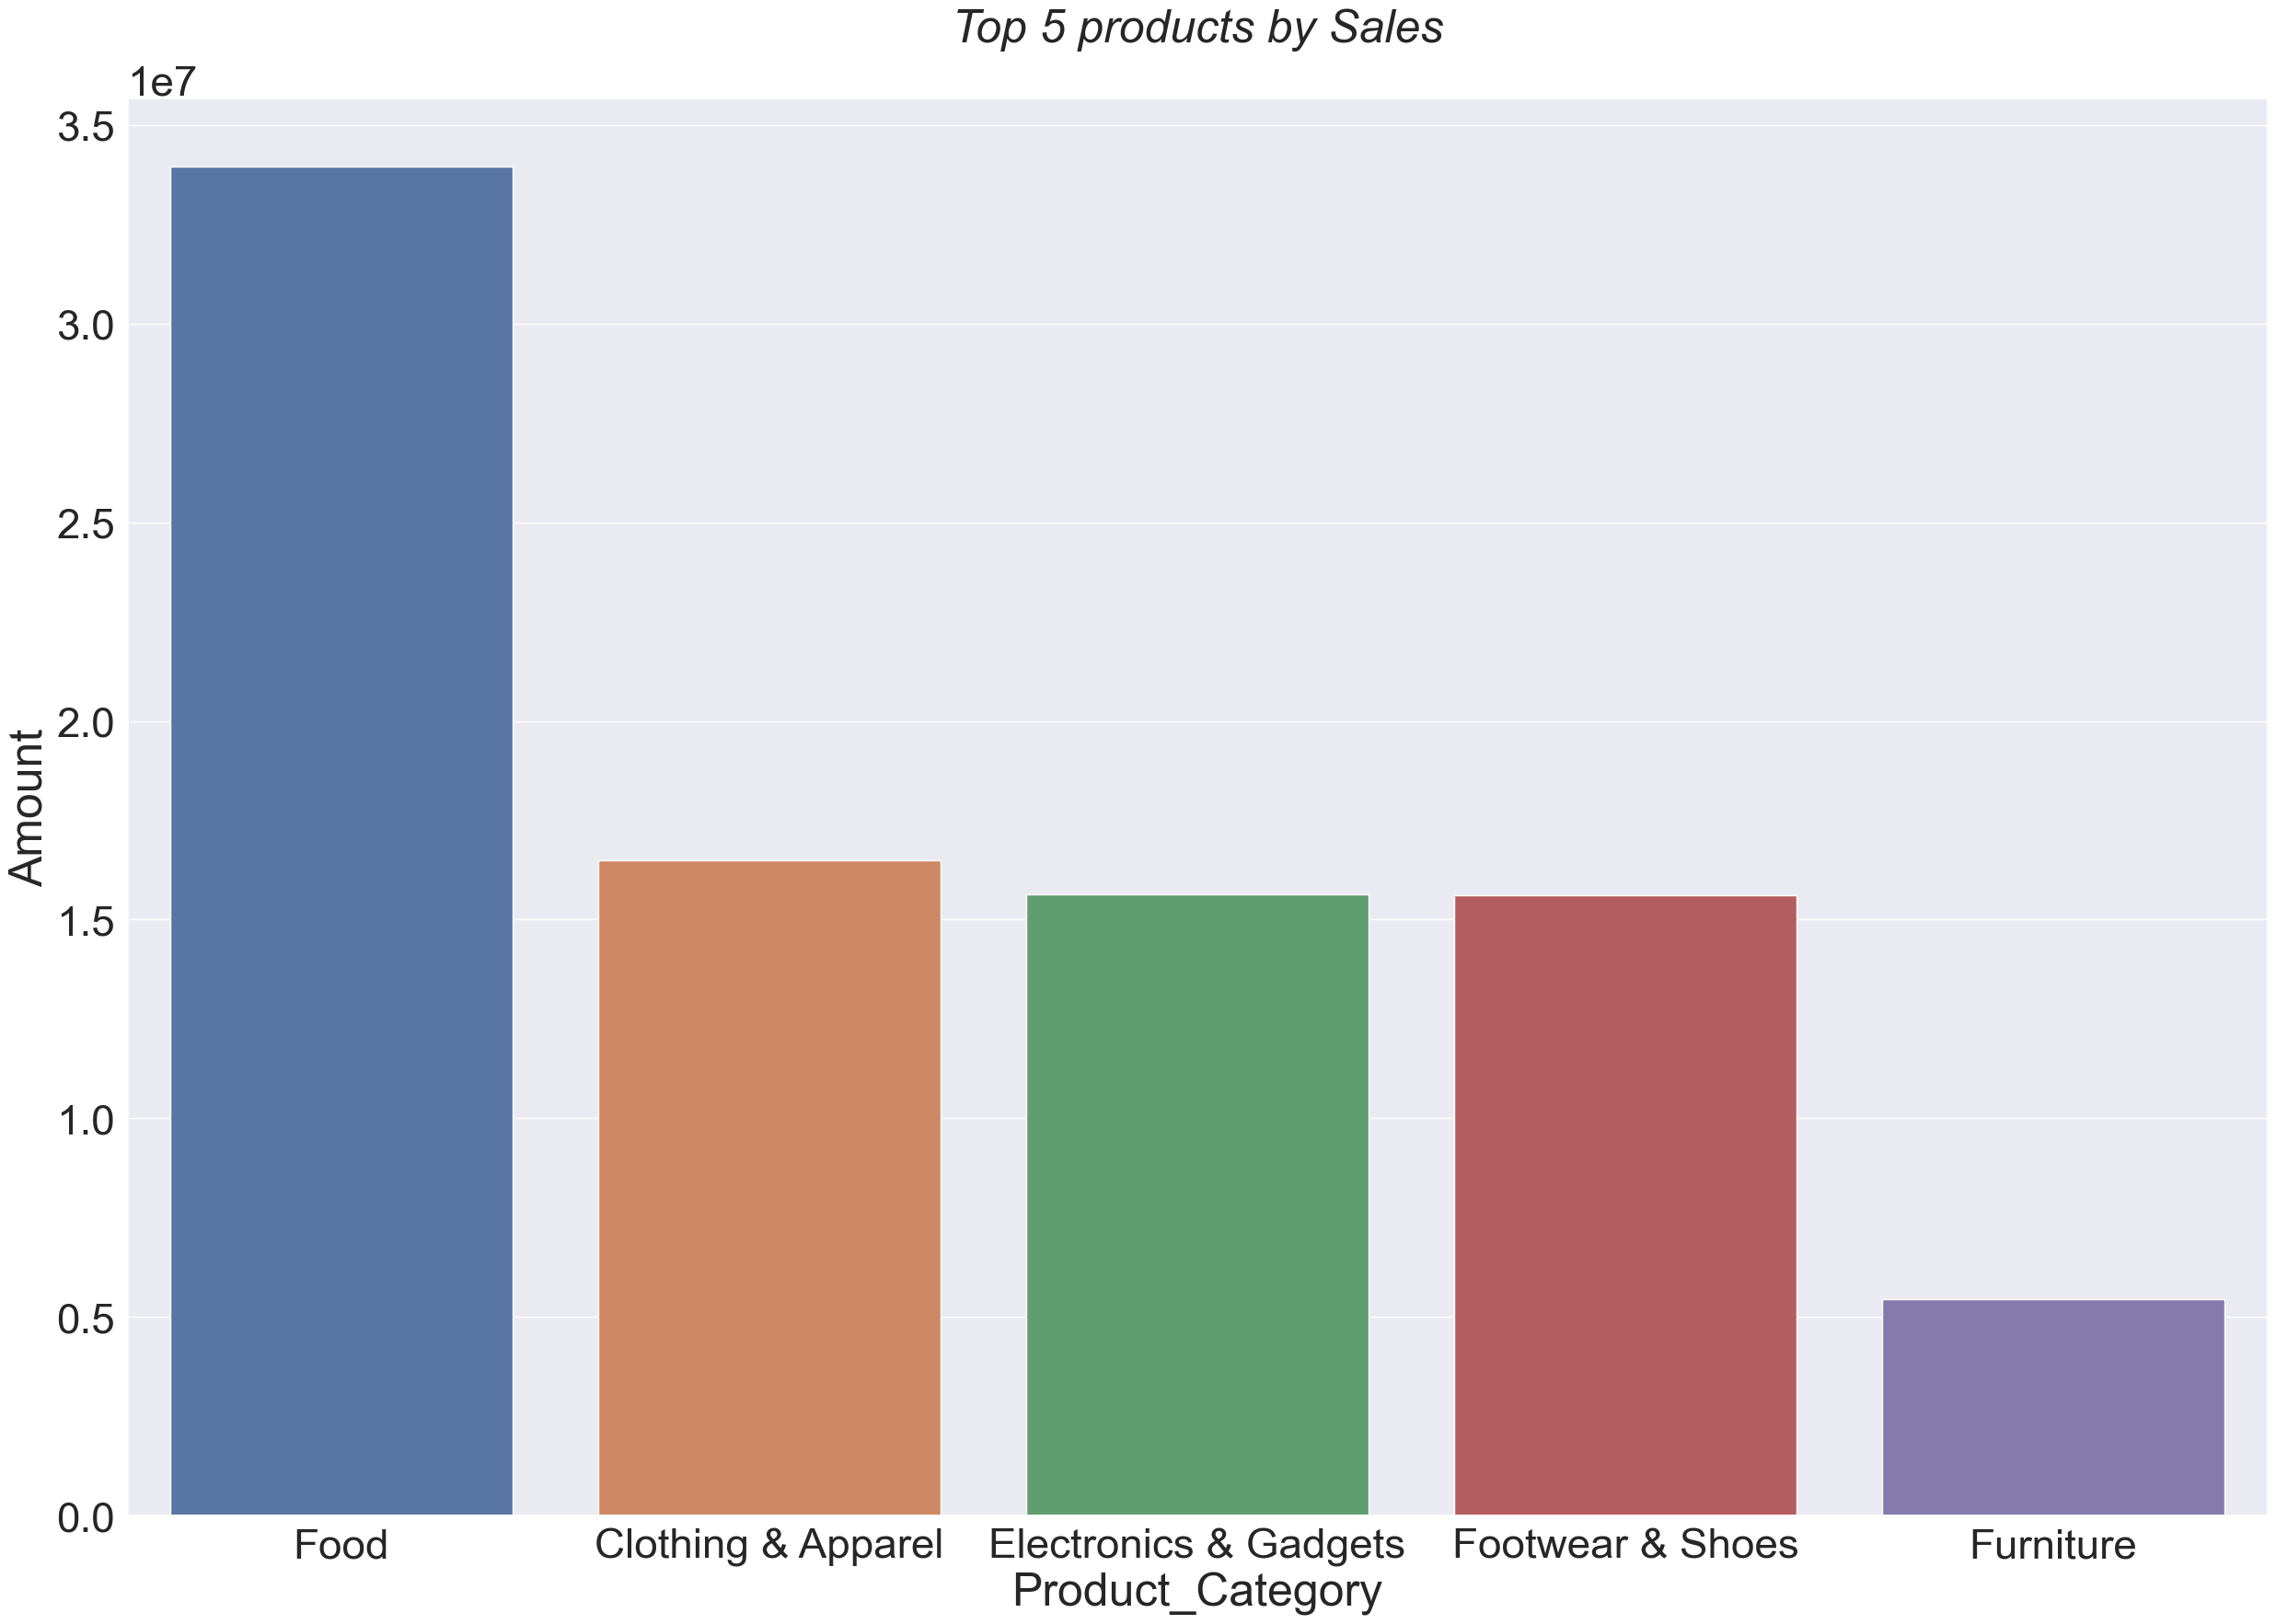

In [126]:
plt.figure(figsize=(30,20))
plt.title("Top 5 products by Sales\n",fontstyle="italic")
sns.barplot(x="Product_Category",y="Amount",data=df_amount.head(5))
sns.set(font_scale=3)
plt.show()

# Conclusion:- most purchase items are clothing ,food ,electronic footwear and Furniture



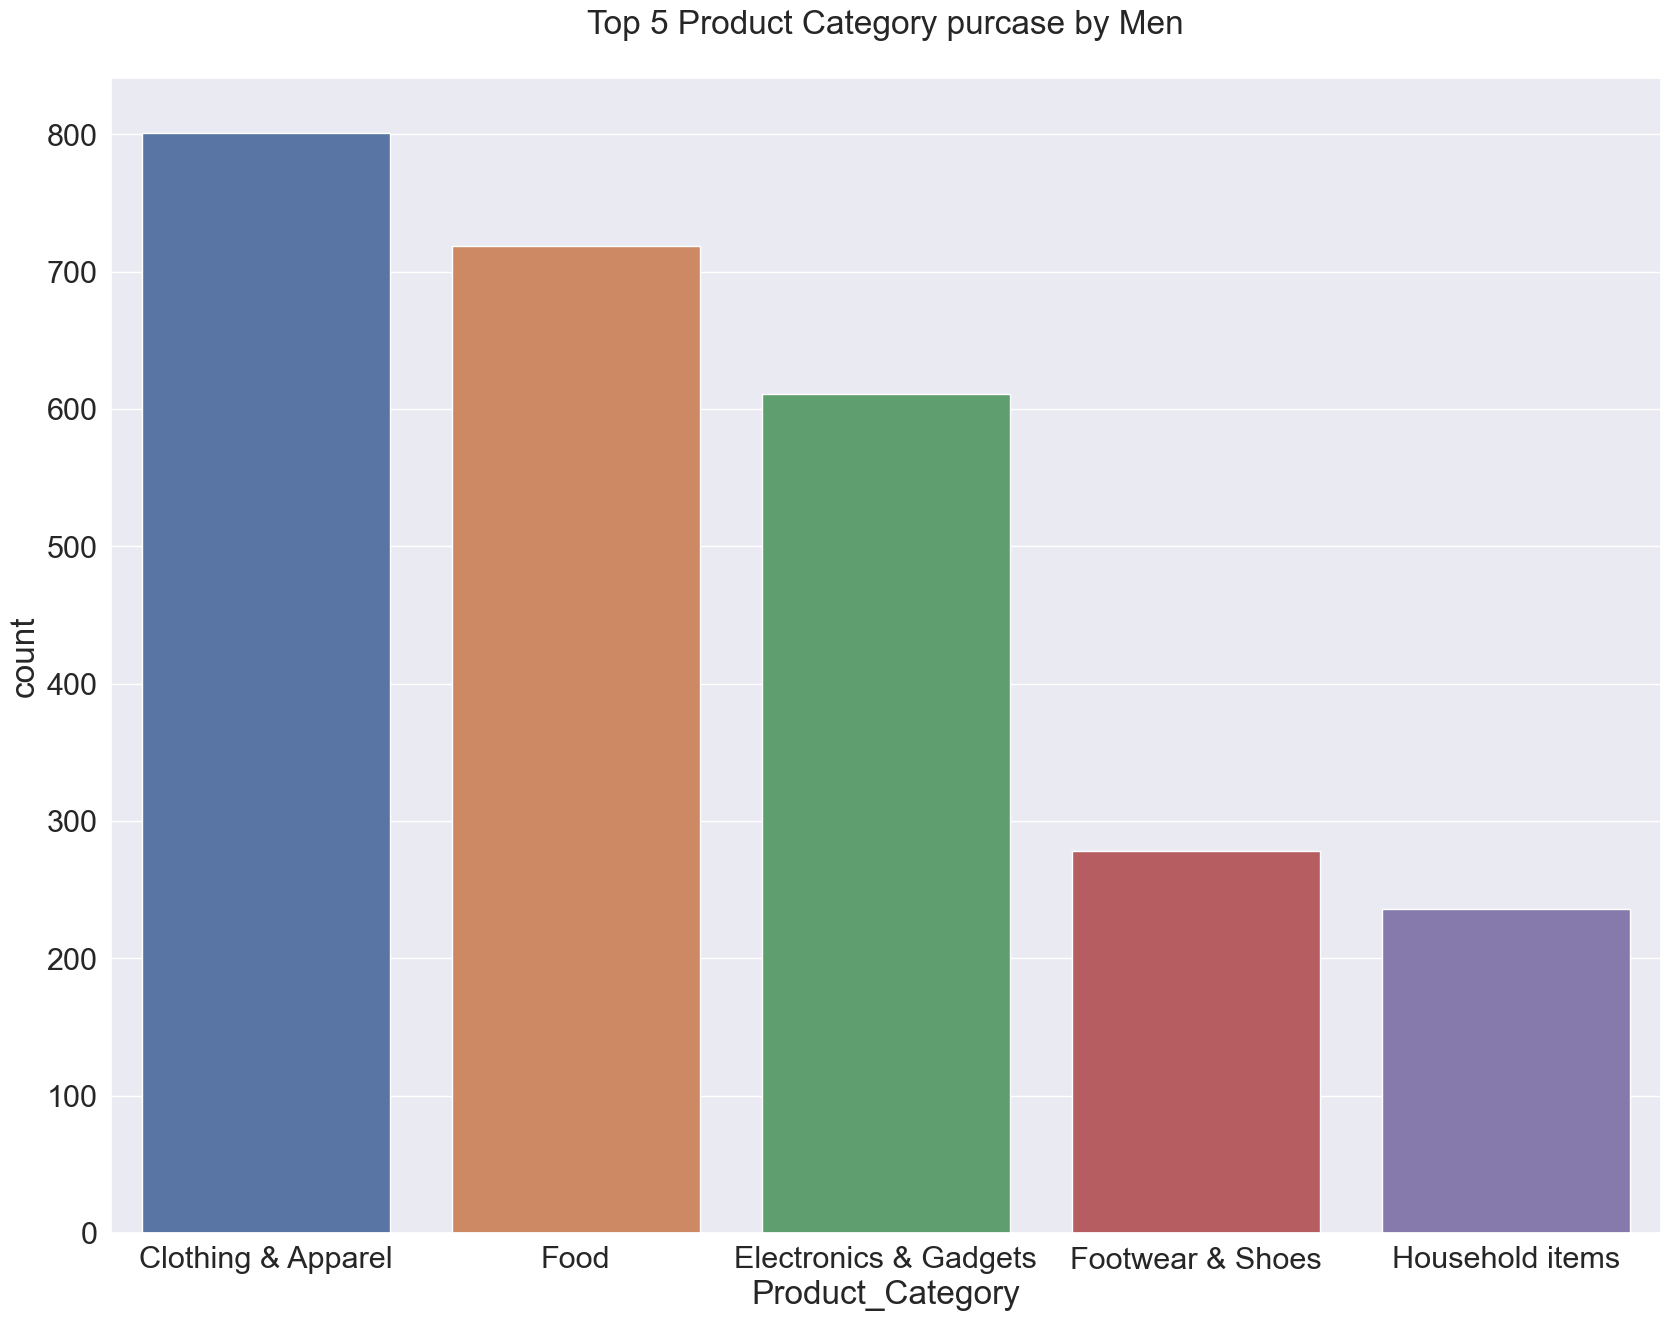

In [275]:
plt.figure(figsize=(20,15))
plt.title("Top 5 Product Category purcase by Men\n")
sns.barplot(x="Product_Category",y="count",data=df_male.sort_values(by="count",ascending=False).head(5))
sns.set(font_scale=2)

# Conclusion:- Men's Top 5 purchase 
# 1. Clothing and Apparel
# 2. Food
# 3. Electronic & Gadgets
# 4. Footwear
# 5. Household items

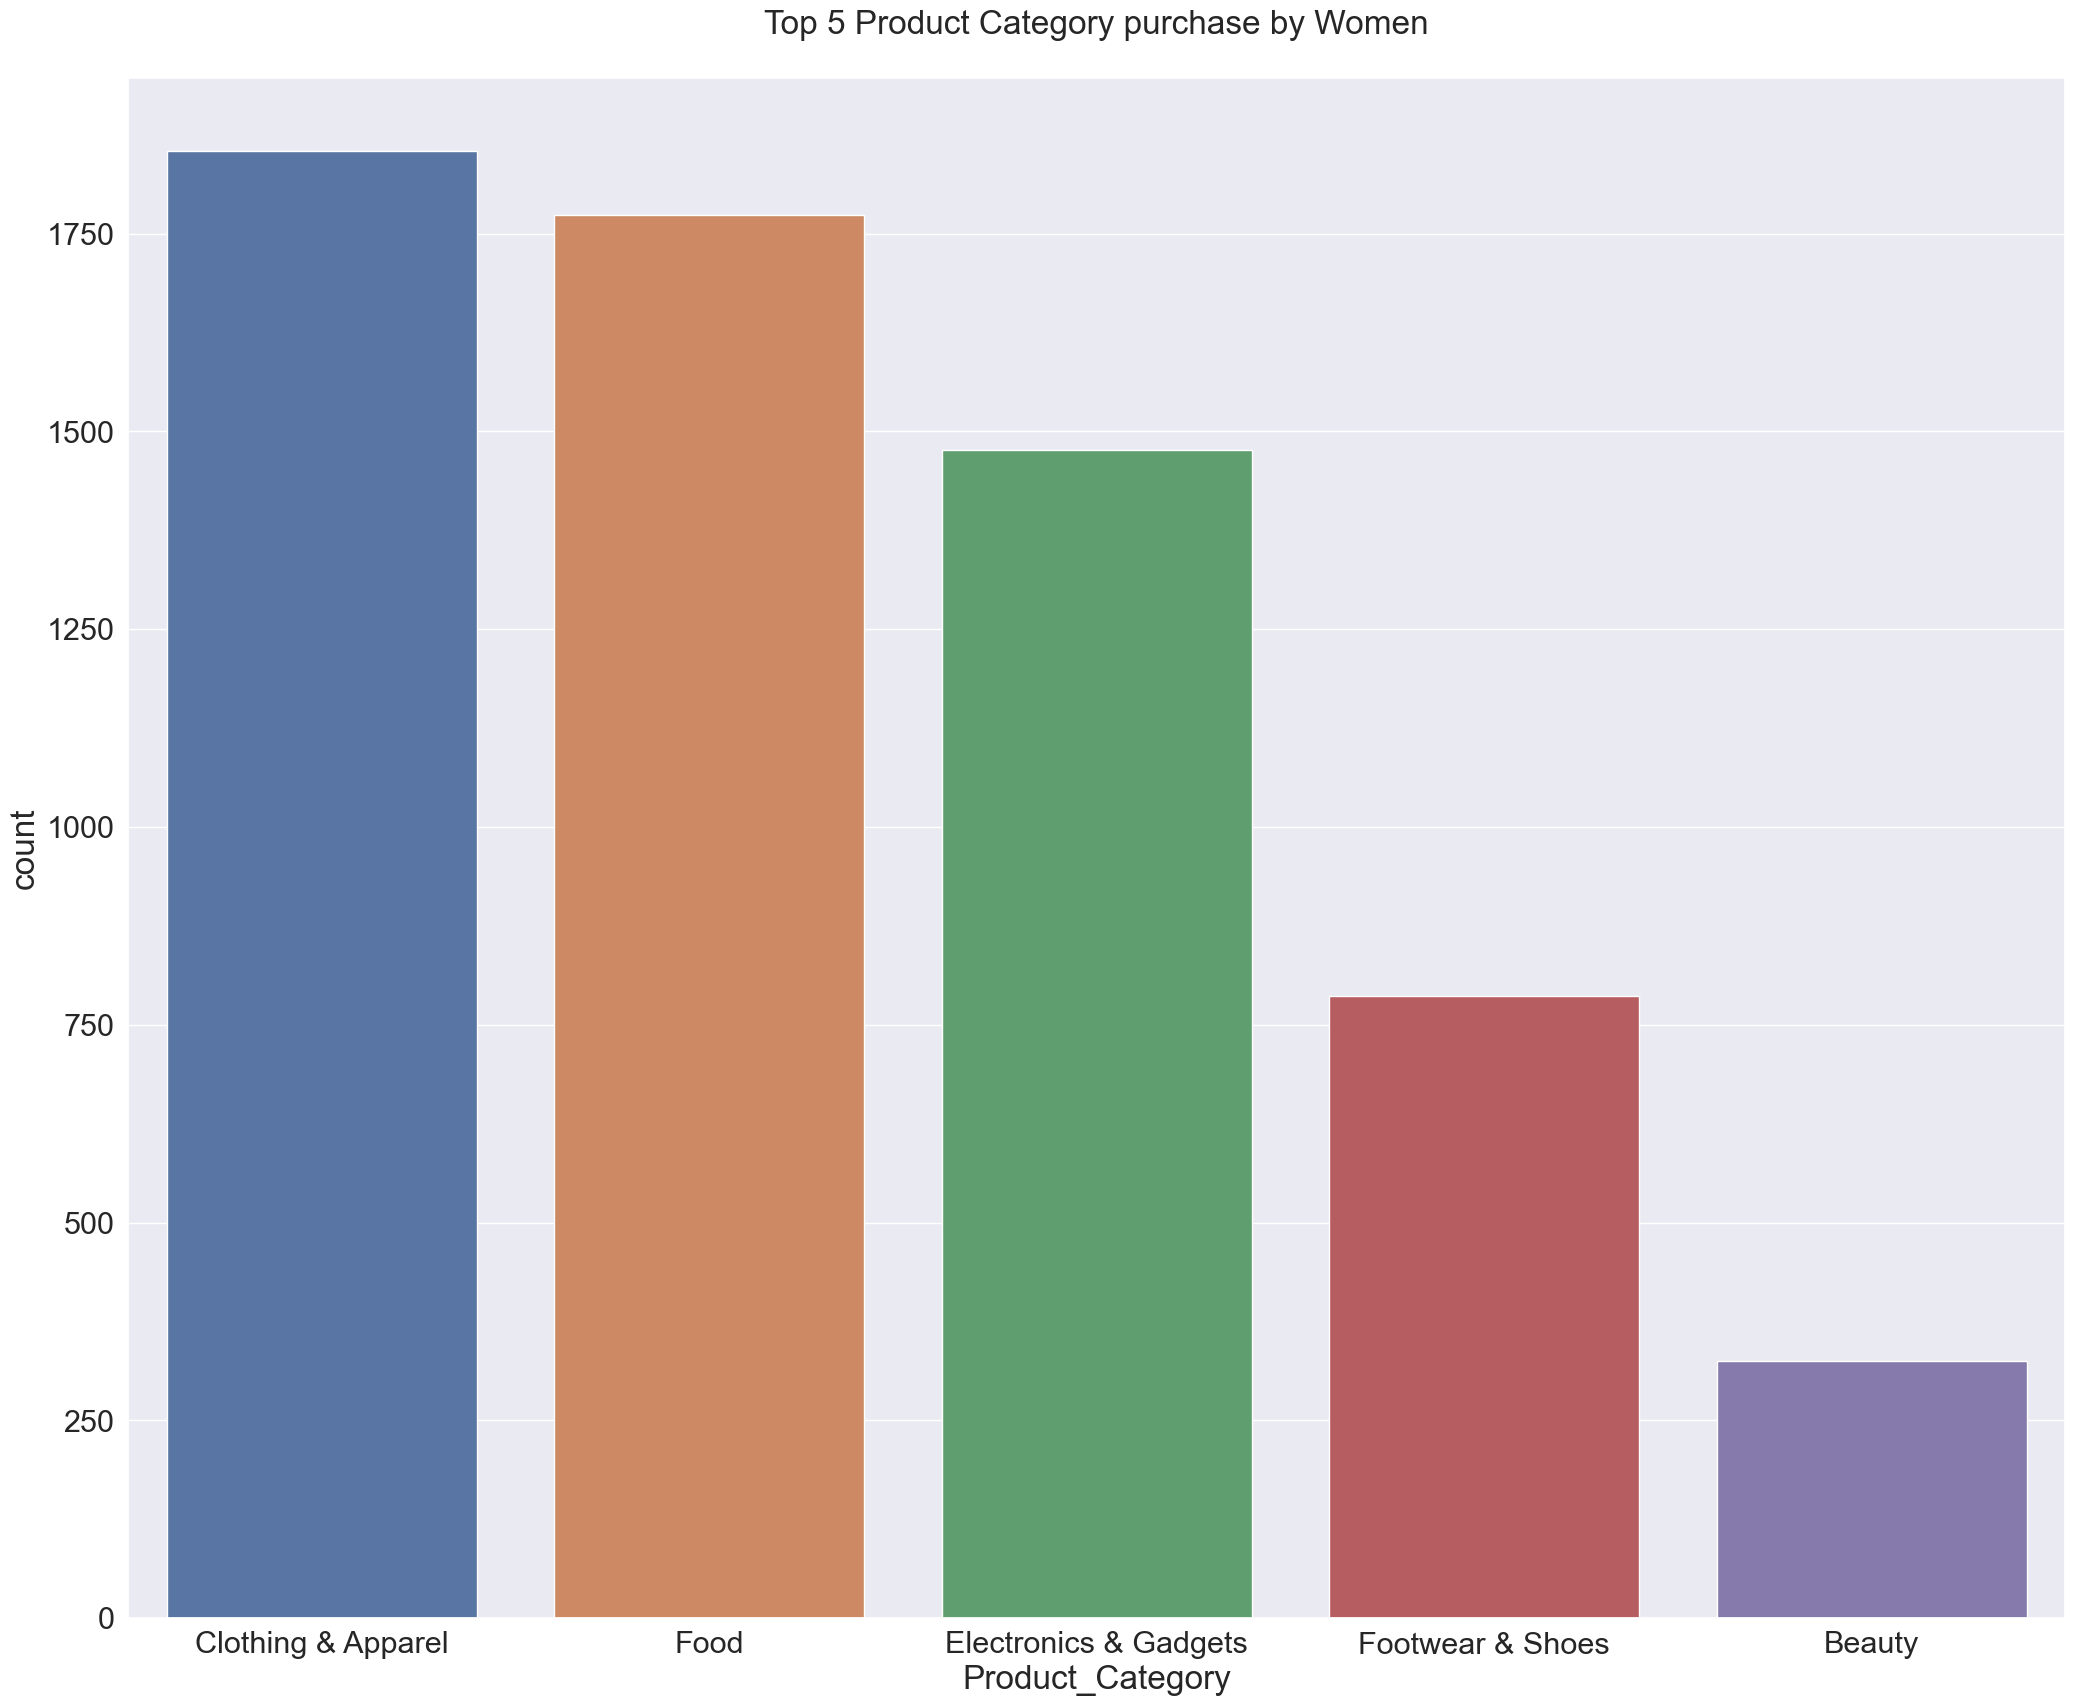

In [274]:
plt.figure(figsize=(25,20))
plt.title("Top 5 Product Category purchase by Women\n")
sns.barplot(x="Product_Category",y="count",data=df_female.sort_values(by="count",ascending=False).head(5))
plt.show()

# Conclusion :- Women's Top 5 purchase 

# 1. Clothing and Apparel
# 2. Food
# 3. Electronic & Gadgets
# 4. Footwear
# 5. Beauty
 

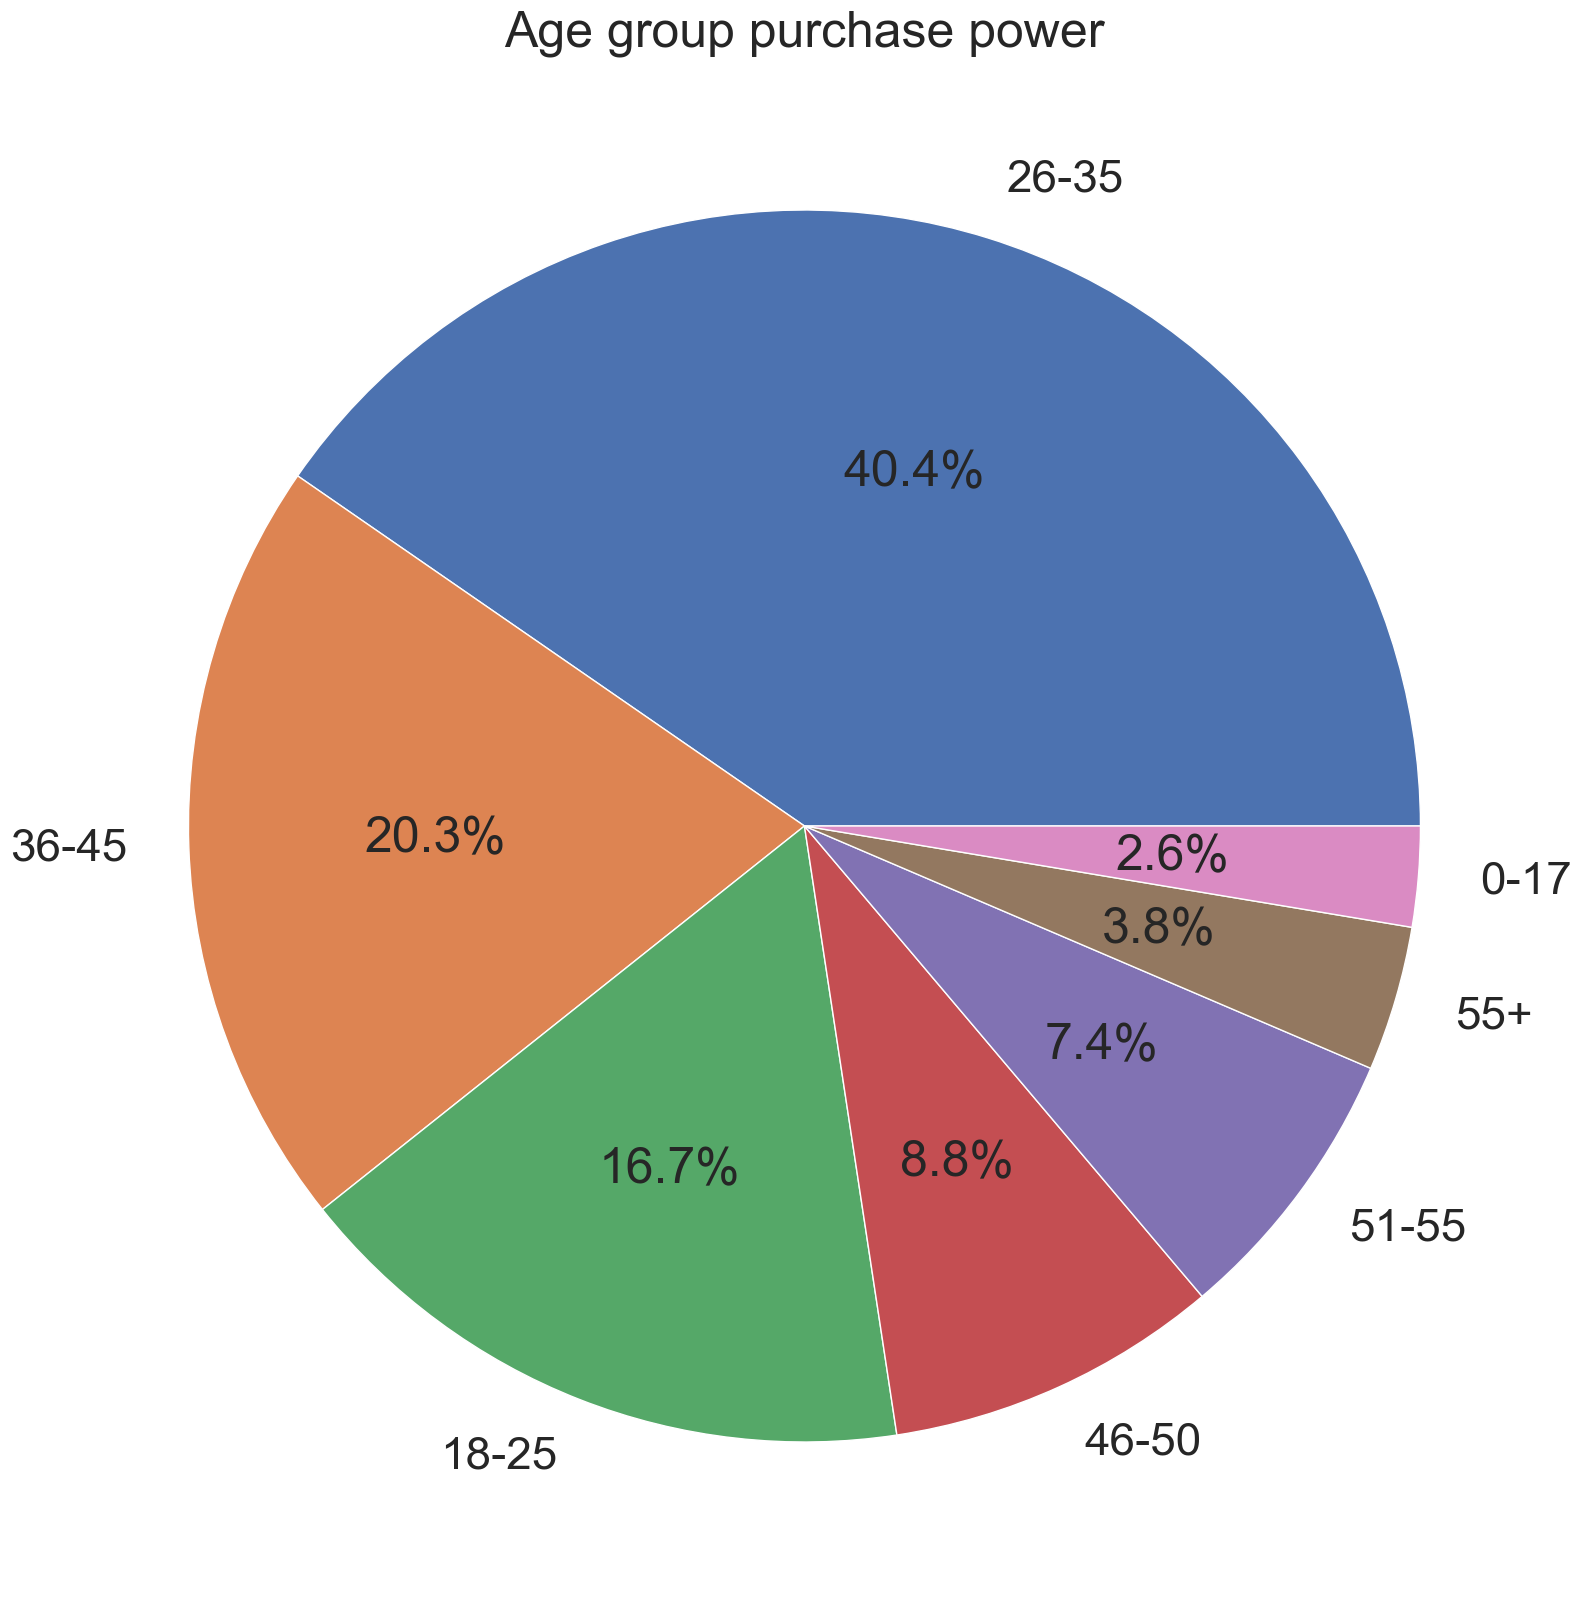

In [57]:
plt.figure(figsize=(25,20))
plt.title("Age group purchase power")
plt.pie(x="count",data=df_age_group.sort_values(by="count",ascending=False),labels=["26-35","36-45","18-25","46-50","51-55","55+","0-17"],autopct="%0.01f%%")
plt
plt.show()

# Conclusion :- Age group 26-35 has done more purchase than any other group